In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as ss

In [3]:
data = pd.read_excel('Online Retail.xlsx')
data.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
data.shape


(541909, 8)

In [5]:
data.info(),data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


(None,
             Quantity      UnitPrice     CustomerID
 count  541909.000000  541909.000000  406829.000000
 mean        9.552250       4.611114   15287.690570
 std       218.081158      96.759853    1713.600303
 min    -80995.000000  -11062.060000   12346.000000
 25%         1.000000       1.250000   13953.000000
 50%         3.000000       2.080000   15152.000000
 75%        10.000000       4.130000   16791.000000
 max     80995.000000   38970.000000   18287.000000)

In [6]:
country_data = data[['Country','CustomerID']].drop_duplicates()
country_data.groupby(['Country']).agg({'CustomerID' : 'count'}).sort_values('CustomerID',ascending = False).reset_index().rename(columns = {'CustomerID':'CustomerID Count'})

,Country,CustomerID Count
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


In [13]:
data1 = data.copy()


In [14]:
#Filter out only UK
data = data[data['Country'] == 'United Kingdom'].reset_index(drop = True)
data.shape

(361878, 8)

In [15]:
data.isna().sum()


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [16]:
data = data[pd.notnull(data['CustomerID'])]

#Checking the description of the data
data.describe()

,Quantity,UnitPrice,CustomerID
count,361878.000000,361878.000000,361878.000000
mean,11.077029,3.256007,15547.871368
std,263.129266,70.654731,1594.402590
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14194.000000
50%,4.000000,1.950000,15514.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


In [17]:
data = data.query("Quantity > 0")
data.shape

(354345, 8)

In [18]:
data['TotalAmount'] = data['UnitPrice']*data['Quantity']


In [19]:
data['InvoiceDate']=pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [20]:
Latest_date = dt.datetime(2011,12,10)
RFM_data = data.groupby('CustomerID').agg({'InvoiceDate' : lambda x :(Latest_date - x.max()).days,
                                          'InvoiceNo' : 'count','TotalAmount' : 'sum'}).reset_index()

#converting the names of the columns
RFM_data.rename(columns = {'InvoiceDate' : 'Recency',
                          'InvoiceNo' : "Frequency",
                          'TotalAmount' : "Monetary"},inplace = True)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [21]:
RFM_data.iloc[:,1:4].describe()


,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000
mean,91.722265,90.371079,1863.910113
std,99.528532,217.796155,7481.922217
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,300.040000
50%,50.000000,41.000000,651.820000
75%,142.000000,99.000000,1575.890000
max,373.000000,7847.000000,259657.300000


/var/folders/gk/17pkq0j93bl97l2zq6qg33j40000gn/T/ipykernel_16328/1876226408.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_data[var],color= col[i])
/var/folders/gk/17pkq0j93bl97l2zq6qg33j40000gn/T/ipykernel_16328/1876226408.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RFM_data[va

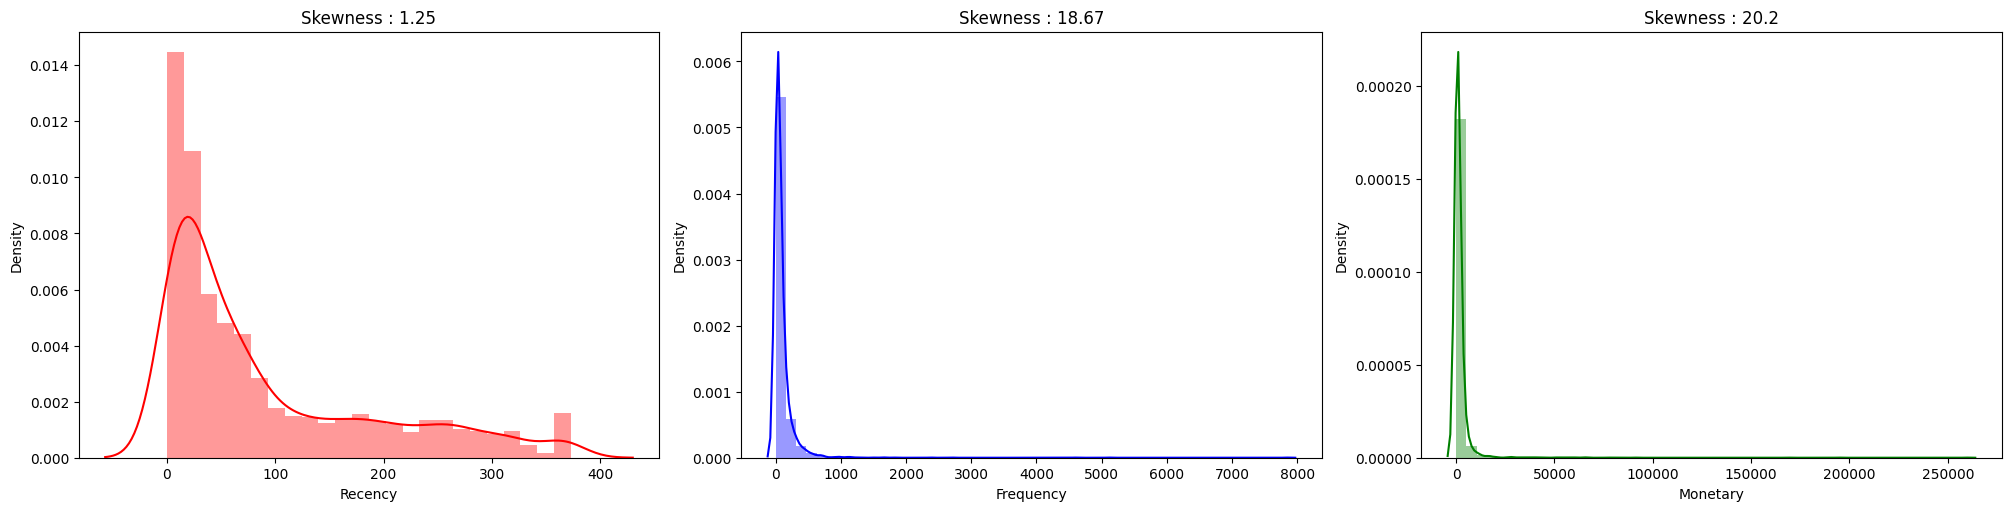

In [22]:
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    

col = ['red','blue','green']
for var in list(RFM_data.columns[1:4]):
    plt.subplot(gs[0,i])
    sns.distplot(RFM_data[var],color= col[i])
    plt.title('Skewness ' + ': ' + round(RFM_data[var].skew(),2).astype(str))
    i= i+1

In [23]:
quantiles = RFM_data.drop('CustomerID',axis = 1).quantile(q = [0.25,0.5,0.75])
quantiles.to_dict()

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.04, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [24]:
#Creating the R,F and M scoring/segement function
#[1] Recency scoring (Negative Impact : Higher the value, less valuable)
def R_score(var,p,d):
    if var <= d[p][0.25]:
        return 1
    elif var <= d[p][0.50]:
        return 2
    elif var <= d[p][0.75]:
        return 3
    else:
        return 4
#[2] Frequency and Monetary (Positive Impact : Higher the value, better the customer)
def FM_score(var,p,d):
    if var <= d[p][0.25]:
        return 4
    elif var <= d[p][0.50]:
        return 3
    elif var <= d[p][0.75]:
        return 2
    else:
        return 1

#Scoring:
RFM_data['R_score'] = RFM_data['Recency'].apply(R_score,args = ('Recency',quantiles,))
RFM_data['F_score'] = RFM_data['Frequency'].apply(FM_score,args = ('Frequency',quantiles,))
RFM_data['M_score'] = RFM_data['Monetary'].apply(FM_score,args = ('Monetary',quantiles,))
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4596,33719.73,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2


In [25]:
#Now we will create : RFMGroup and RFMScore
RFM_data['RFM_Group'] = RFM_data['R_score'].astype(str) + RFM_data['F_score'].astype(str) + RFM_data['M_score'].astype(str)

#Score
RFM_data['RFM_Score'] = RFM_data[['R_score','F_score','M_score']].sum(axis = 1)
RFM_data.head()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4596,33719.73,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5


In [26]:
#Creating the Customer segments/ Loyality_level
loyalty_level = ['Passionate Customer','Frequent Shopper','Casual Shopper','Once a year']
cuts = pd.qcut(RFM_data['RFM_Score'],q = 4,labels=loyalty_level)
RFM_data['RFM_Loyality_level'] = cuts.values
RFM_data.tail(15)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Group,RFM_Score,RFM_Loyality_level
3906,18265.0,72,46,801.51,3,2,2,322,7,Frequent Shopper
3907,18268.0,134,1,25.50,3,4,4,344,11,Once a year
3908,18269.0,366,7,168.60,4,4,4,444,12,Once a year
3909,18270.0,38,11,283.15,2,4,4,244,10,Casual Shopper
3910,18272.0,2,166,3078.58,1,1,1,111,3,Passionate Customer
3911,18273.0,2,3,204.00,1,4,4,144,9,Casual Shopper
3912,18274.0,30,11,175.92,2,4,4,244,10,Casual Shopper
3913,18276.0,43,14,335.86,2,4,3,243,9,Casual Shopper
3914,18277.0,58,8,110.38,3,4,4,344,11,Once a year
3915,18278.0,73,9,173.90,3,4,4,344,11,Once a year


In [27]:
# Recency V/s Frequency
fig = px.scatter(RFM_data,x = "Recency", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Frequency V/s Monetary
fig = px.scatter(RFM_data,x = "Monetary", y = "Frequency",color = "RFM_Loyality_level")
fig.show()

# Monetary V/s Recency
fig = px.scatter(RFM_data,x = "Monetary", y = "Recency",color = "RFM_Loyality_level")
fig.show()

# K-Means Clustering

In [28]:
# First will focus on the negative and zero before the transformation.
def right_treat(var):
    if var <= 0:
        return 1
    else:
        return var

# Describing the data
RFM_data.describe()

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
count,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,90.371079,1863.910113,2.490436,2.517470,2.500383,7.508289
std,1576.823683,99.528532,217.796155,7481.922217,1.123257,1.129278,1.118291,2.823461
min,12346.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,3.000000
25%,14208.000000,17.000000,17.000000,300.040000,1.000000,2.000000,2.000000,5.000000
50%,15569.000000,50.000000,41.000000,651.820000,2.000000,3.000000,3.000000,8.000000
75%,16913.000000,142.000000,99.000000,1575.890000,3.000000,4.000000,4.000000,10.000000
max,18287.000000,373.000000,7847.000000,259657.300000,4.000000,4.000000,4.000000,12.000000


In [29]:
#Applying on the data.
RFM_data['Recency'] = RFM_data['Recency'].apply(lambda x : right_treat(x))
RFM_data['Monetary'] = RFM_data['Monetary'].apply(lambda x : right_treat(x))

#Checking the Skewness of R, F and M
print('Recency Skewness : ' + RFM_data['Recency'].skew().astype(str))
print('Frequency Skewness : ' + RFM_data['Frequency'].skew().astype(str))
print('Monetary Skewness : ' + RFM_data['Monetary'].skew().astype(str))

Recency Skewness : 1.2455487195204826
Frequency Skewness : 18.669158065112484
Monetary Skewness : 20.200740172786958
